In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diagnosis=pd.read_csv("diagnosis.csv")
diagnosis.head()

,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
0,4252056,142674,True,21,cardiovascular|chest pain / ASHD|acute coronar...,NaN,Primary
1,3739076,142674,True,21,cardiovascular|chest pain / ASHD|coronary arte...,"414.00, I25.10",Other
2,4003826,142674,True,21,renal|disorder of kidney|acute renal failure,"584.9, N17.9",Other
3,3863618,142674,True,21,pulmonary|disorders of the airways|obstructive...,"780.57, G47.33",Other
4,4103388,142674,True,21,cardiovascular|arrhythmias|atrial fibrillation,"427.31, I48.0",Other


In [3]:
cases=diagnosis.loc[diagnosis['diagnosisstring'].str.contains("sepsis")]

In [4]:
control=diagnosis.loc[~diagnosis['diagnosisstring'].str.contains("sepsis")]

In [5]:
cases_pids=np.unique(cases['patientunitstayid'])

In [6]:
control_pids=np.unique(control['patientunitstayid'])

In [7]:
vitalp=pd.read_csv("vitalPeriodic.csv")
np.shape(vitalp)

(1037527, 19)

In [17]:
vital_cases=pd.Series([])
for i in cases_pids:
    vital_cases=vital_cases.append(vitalp.loc[vitalp['patientunitstayid']==i])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [18]:
'''vital_cases['heartrate']=vital_cases.fillna(vital_cases['heartrate'].mean())
vital_cases['systemicsystolic']=vital_cases.fillna(vital_cases['systemicsystolic'].mean())
vital_cases['respiration']=vital_cases.fillna(vital_cases['respiration'].mean())'''
vital_cases.sort_values(by=['observationoffset'],inplace=True)
for pid in vital_cases['patientunitstayid'].unique():
       

In [19]:
vital_cases

,0,vitalperiodicid,patientunitstayid,observationoffset,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
293274,NaN,68572447.0,295793.0,-1713.0,NaN,97.0,84.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN
293271,NaN,68572418.0,295793.0,-1708.0,NaN,97.0,84.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN
293265,NaN,68572389.0,295793.0,-1703.0,NaN,97.0,85.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN
293259,NaN,68572360.0,295793.0,-1698.0,NaN,97.0,86.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN
293256,NaN,68572331.0,295793.0,-1693.0,NaN,97.0,86.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN
293253,NaN,68572302.0,295793.0,-1688.0,NaN,98.0,87.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN
293250,NaN,68572273.0,295793.0,-1683.0,NaN,98.0,86.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN
293482,NaN,68572244.0,295793.0,-1678.0,NaN,99.0,86.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN
293228,NaN,68572215.0,295793.0,-1673.0,NaN,99.0,85.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN
293414,NaN,68572186.0,295793.0,-1668.0,NaN,99.0,89.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN


In [11]:
cases_toplot=vital_cases.iloc[:500,:]

In [12]:
cases_toplot.drop(columns=[0],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


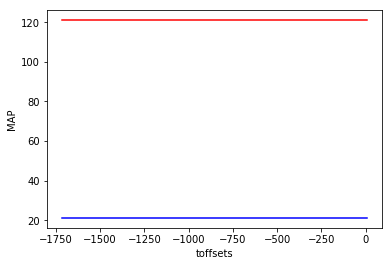

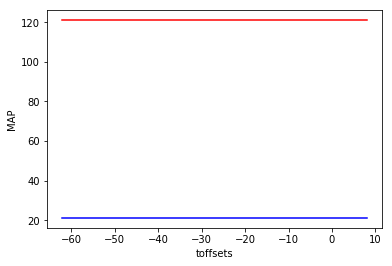

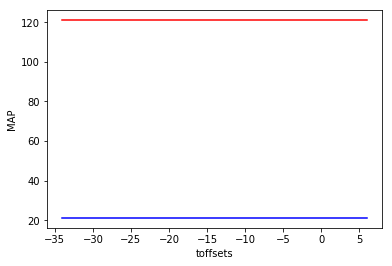

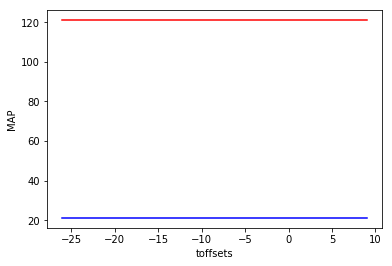

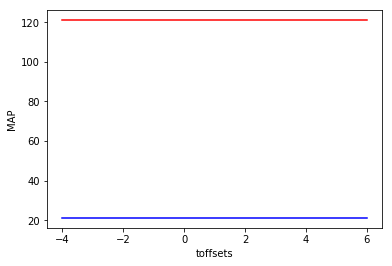

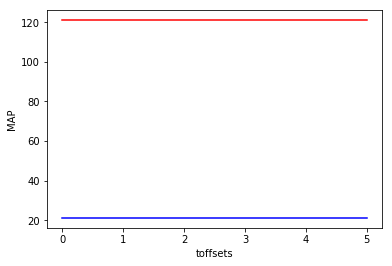

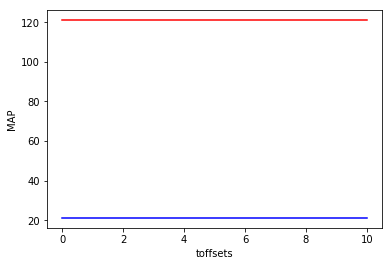

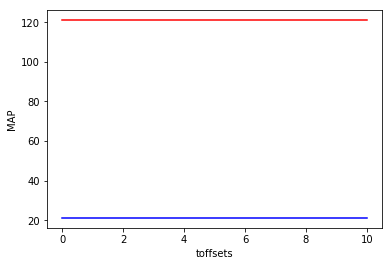

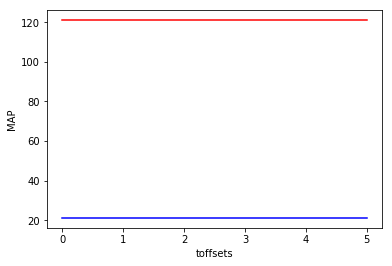

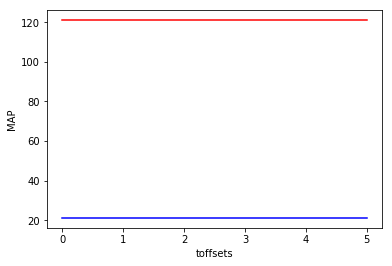

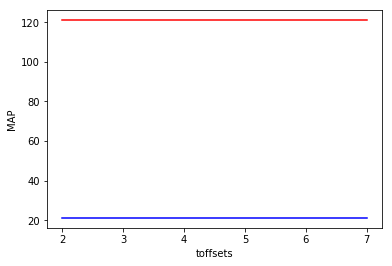

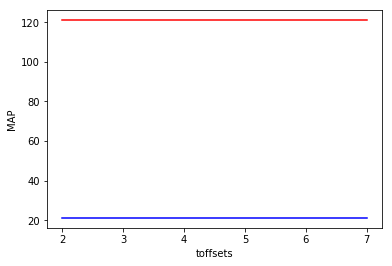

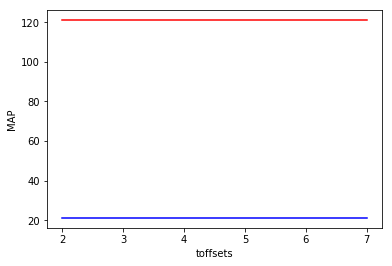

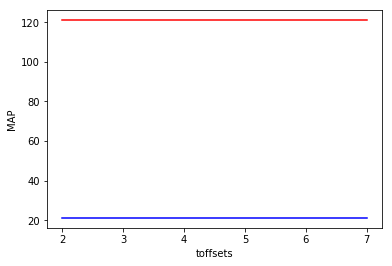

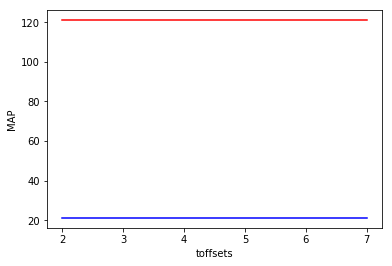

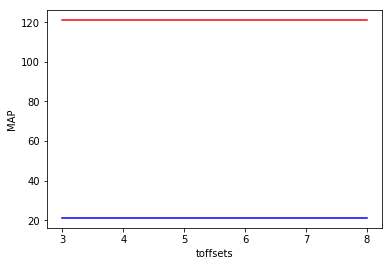

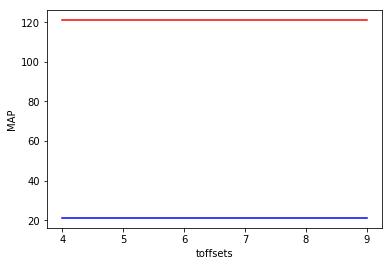

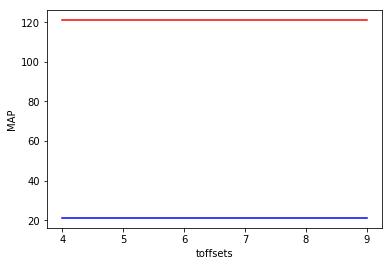

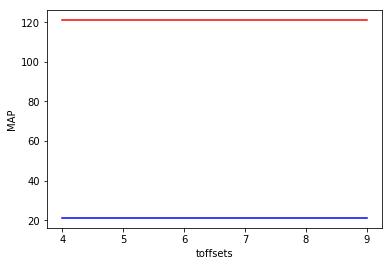

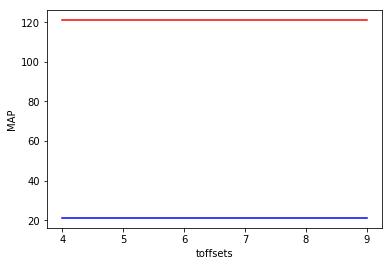

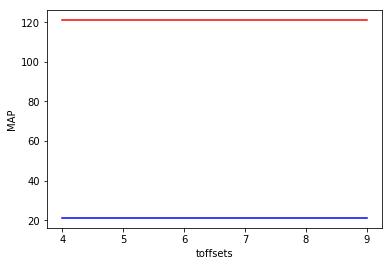

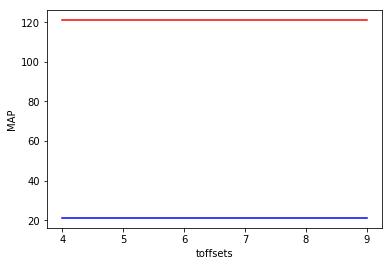

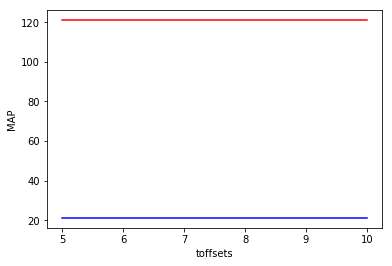

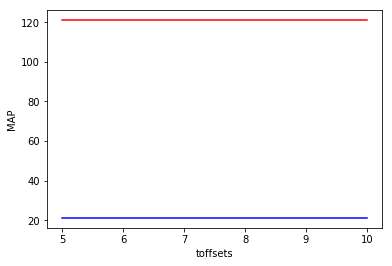

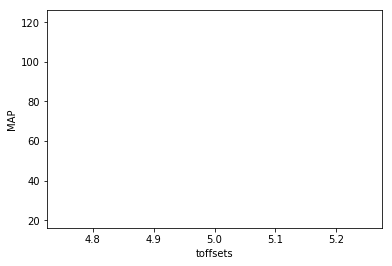

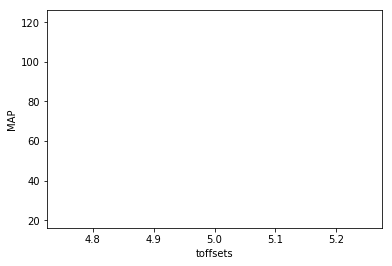

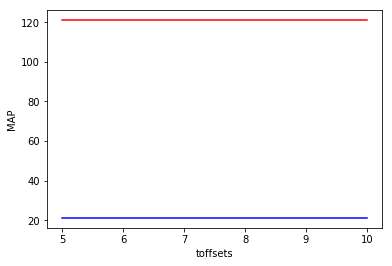

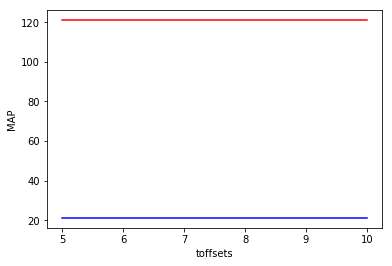

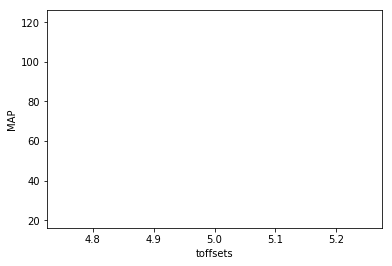

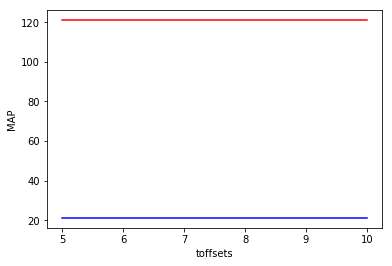

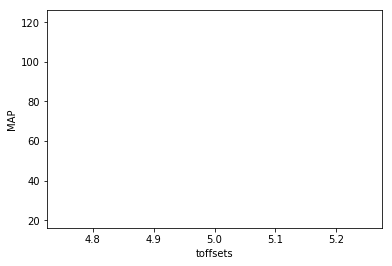

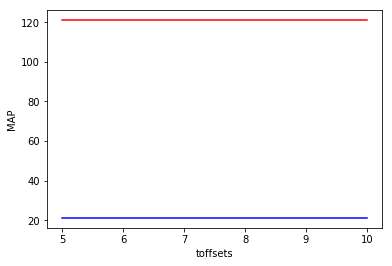

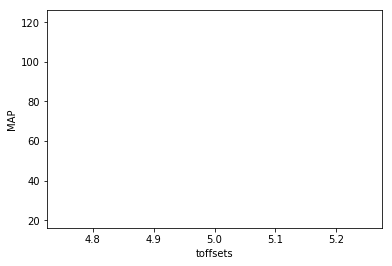

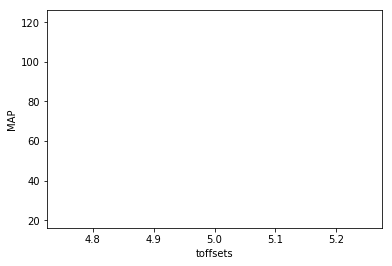

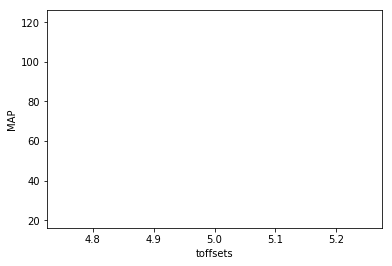

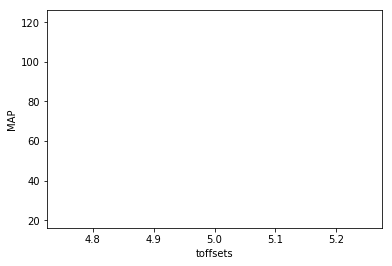

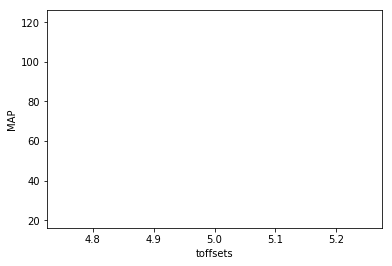

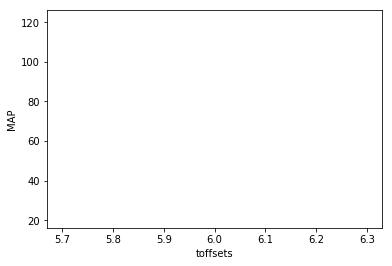

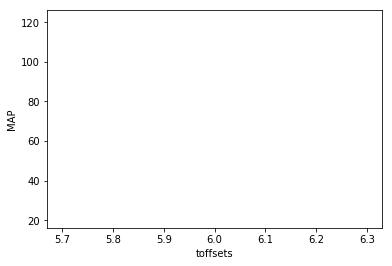

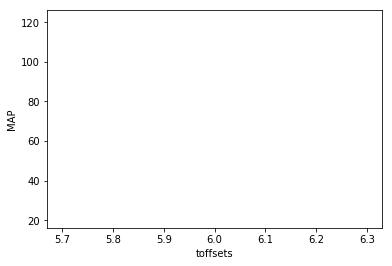

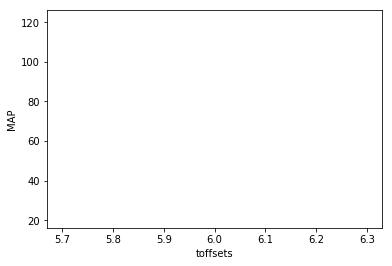

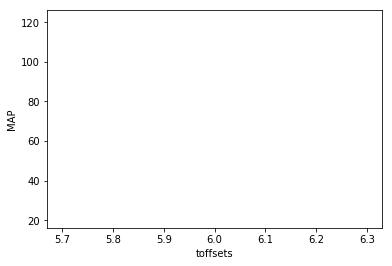

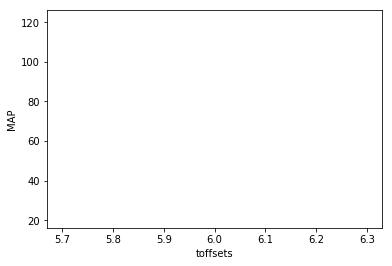

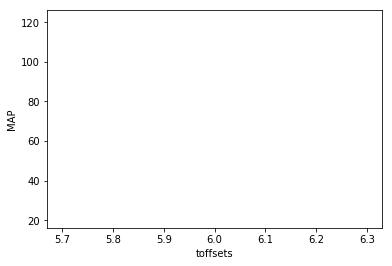

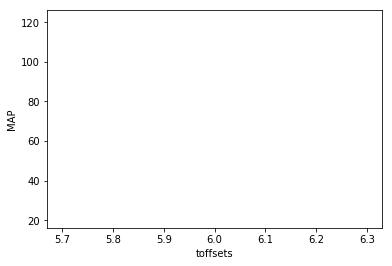

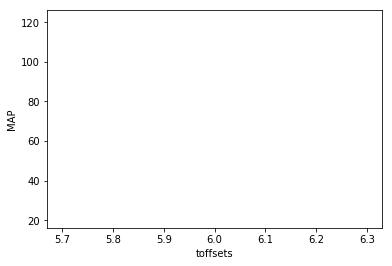

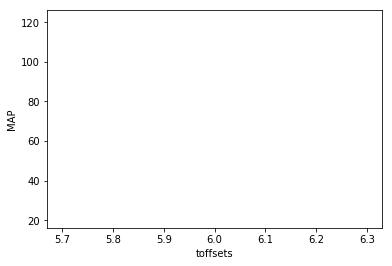

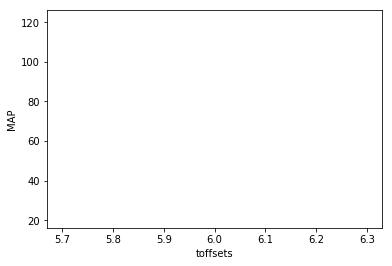

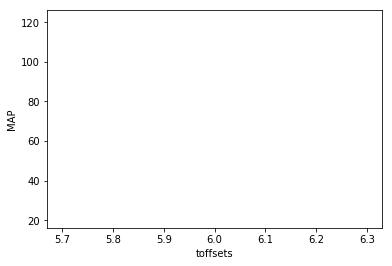

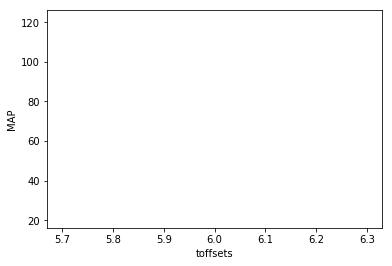

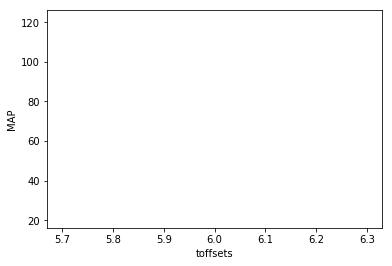

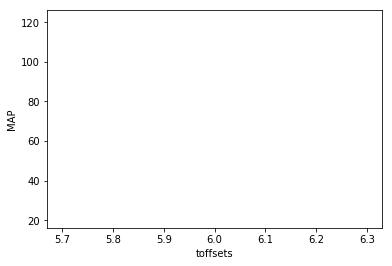

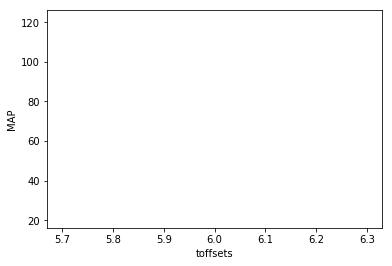

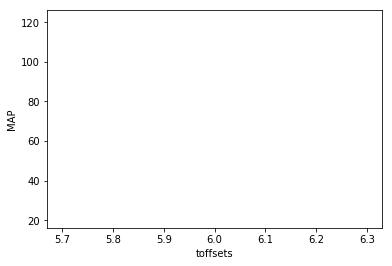

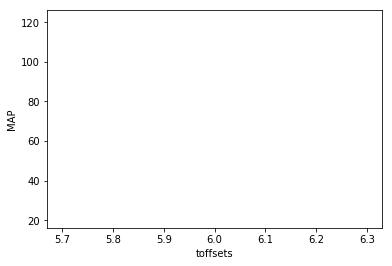

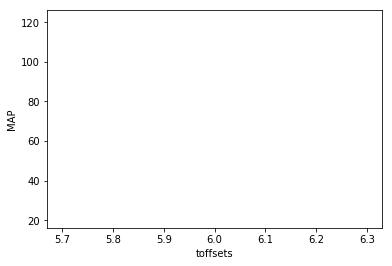

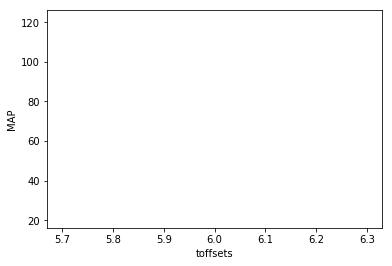

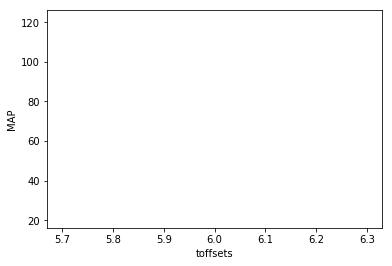

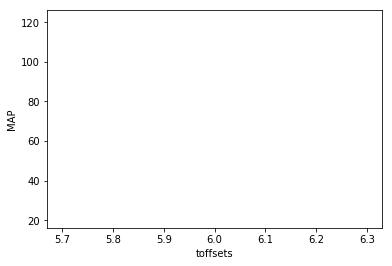

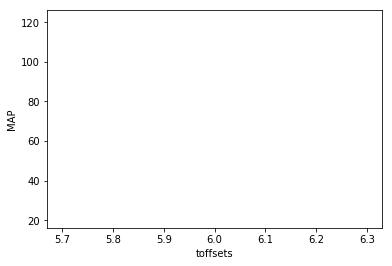

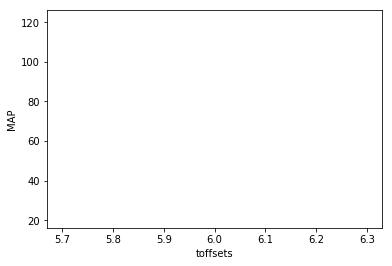

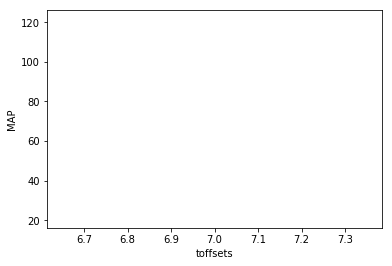

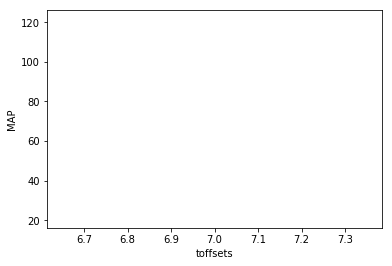

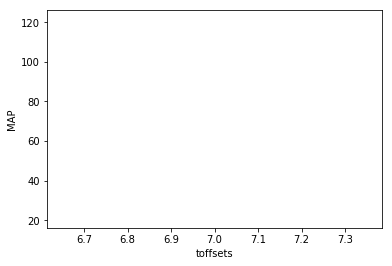

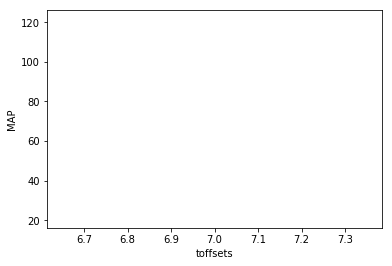

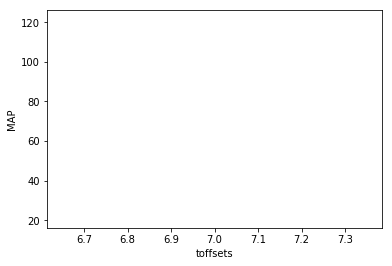

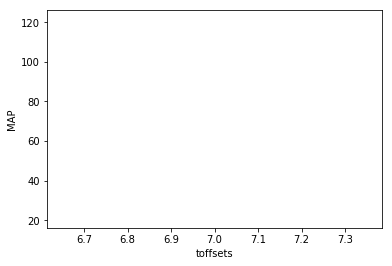

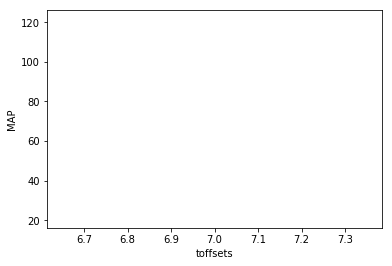

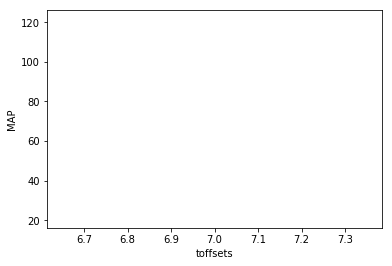

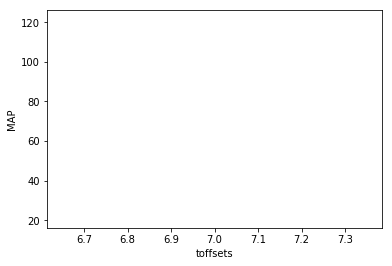

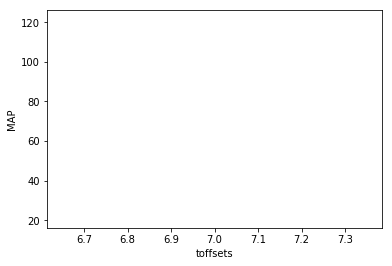

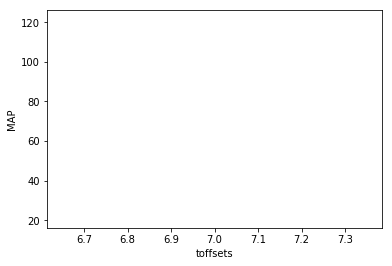

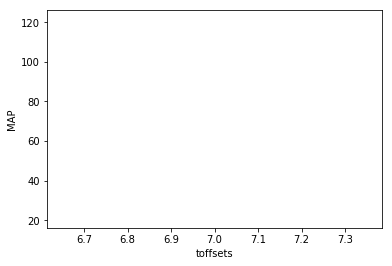

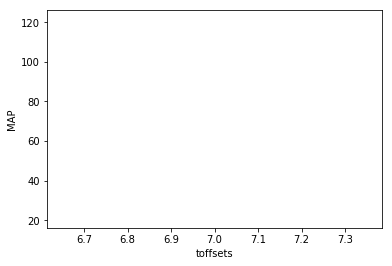

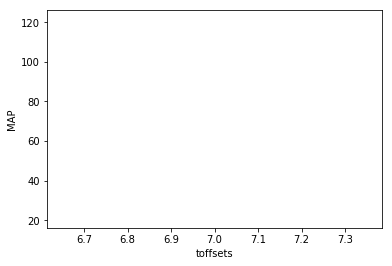

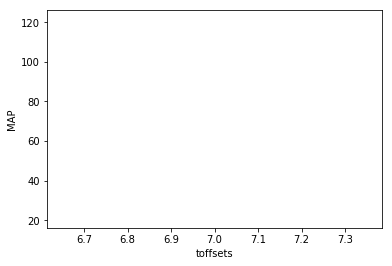

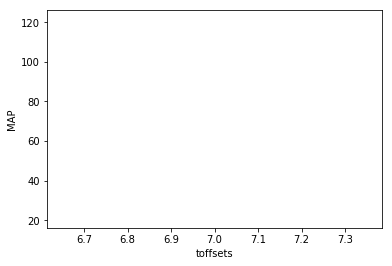

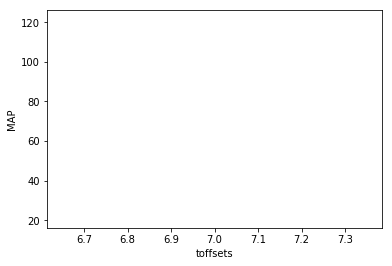

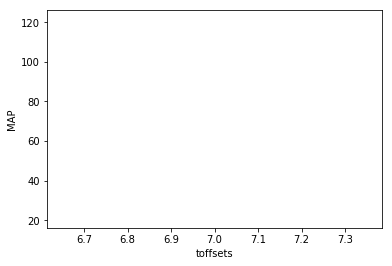

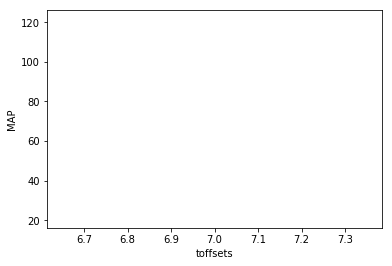

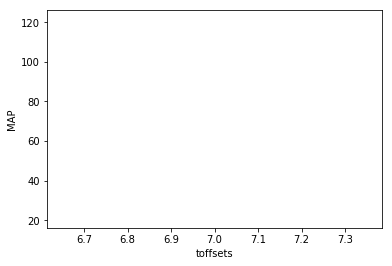

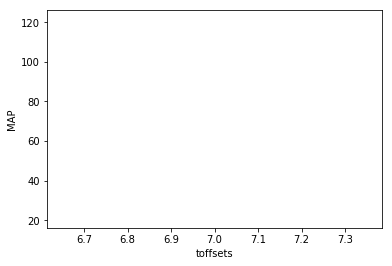

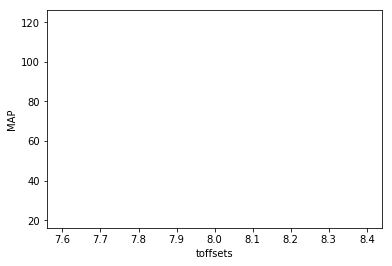

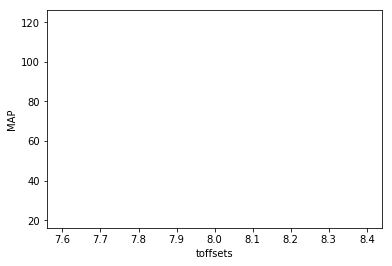

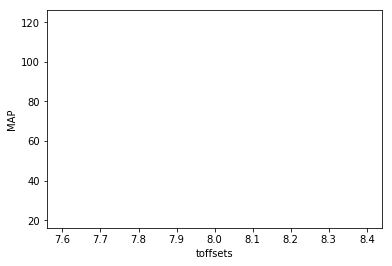

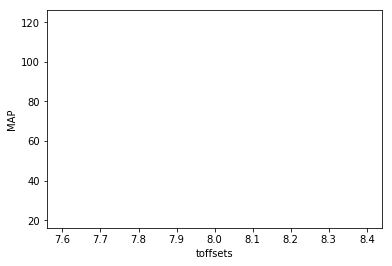

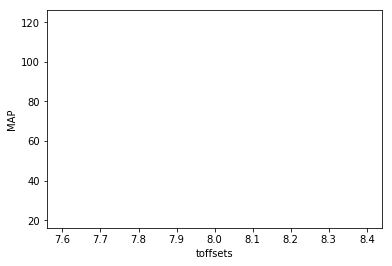

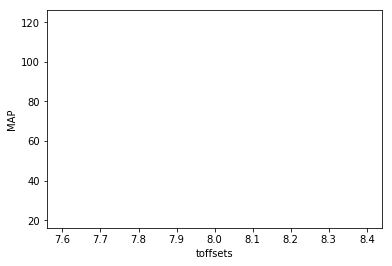

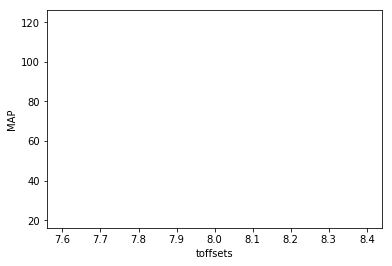

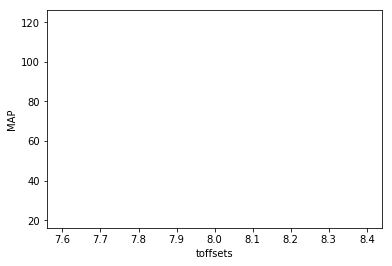

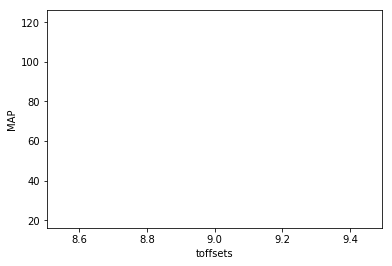

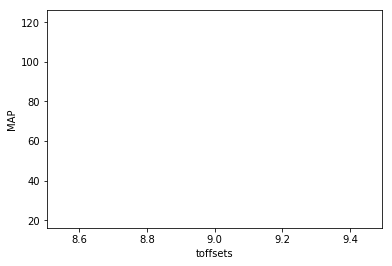

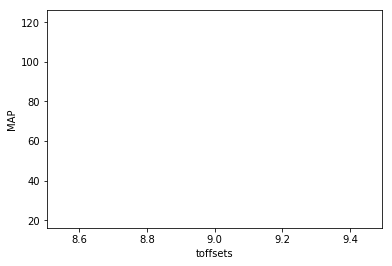

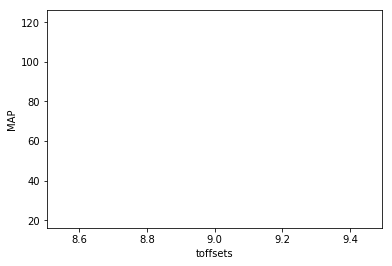

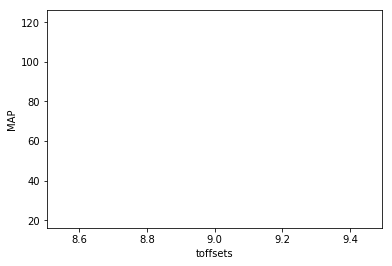

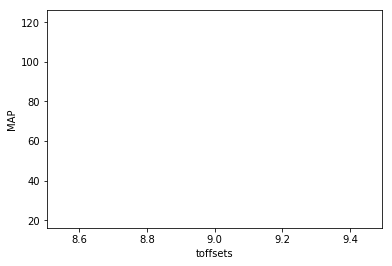

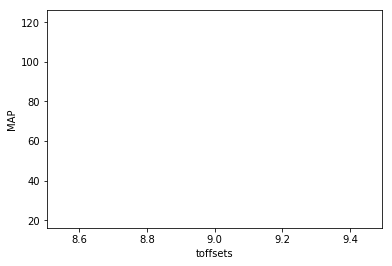

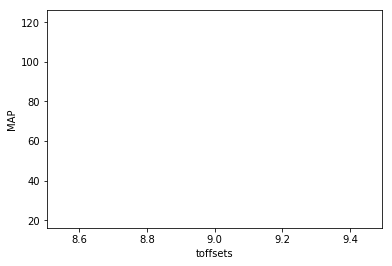

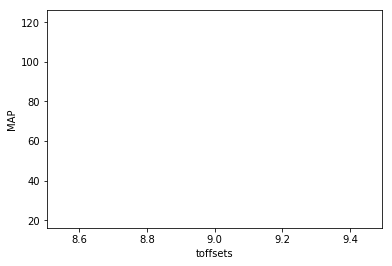

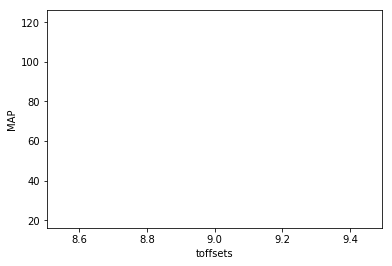

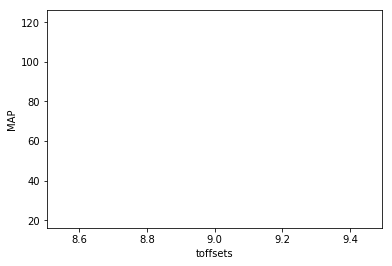

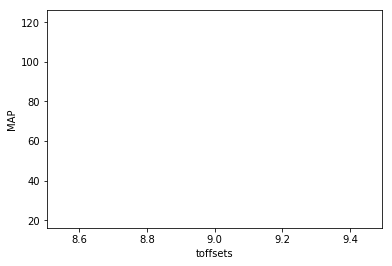

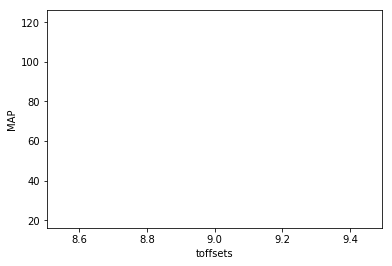

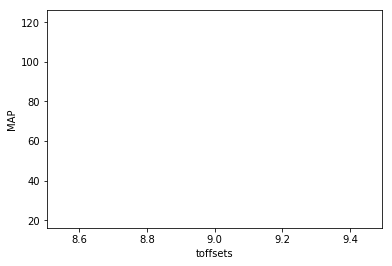

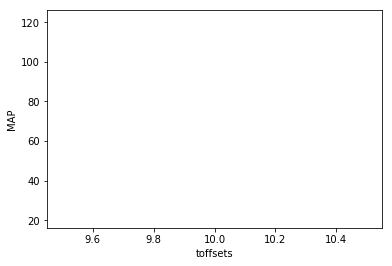

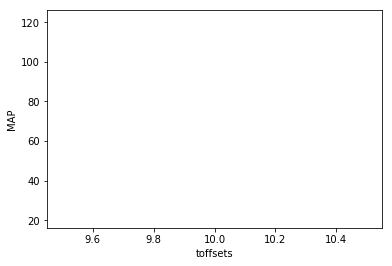

In [49]:
for pid in cases_toplot['patientunitstayid'].unique():
    uniqueid=cases_toplot.loc[cases_toplot['patientunitstayid']==pid]
    MAP=uniqueid['systemicsystolic'].values
    
    resprates=uniqueid['respiration'].values
    timestamps=uniqueid['observationoffset'].values
    
    plt.plot(timestamps,MAP,color='red')
    plt.plot(timestamps,resprates,color='blue')
    plt.xlabel("toffsets")
    plt.ylabel("MAP")
    plt.show()

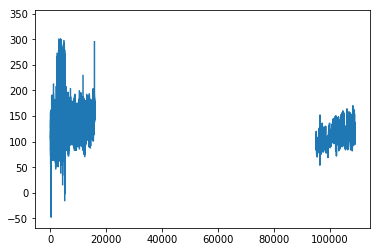

In [20]:
plt.plot(vital_cases['observationoffset'].values,vital_cases['systemicsystolic'].values)
plt.show()